In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else (x))


In [2]:
df_e = df.explode('job_skills')

<Axes: xlabel='job_skills'>

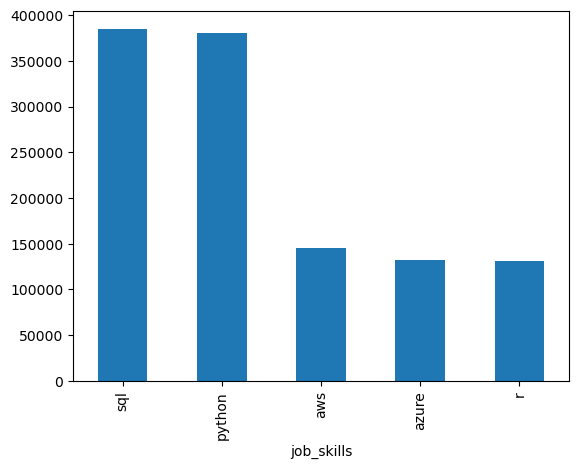

In [3]:
df_e['job_skills'].value_counts().head().plot(kind='bar')

In [4]:
skills_count = df_e.groupby(['job_title_short','job_skills']).size()

df_skills_count = skills_count.reset_index(name='skill_count')

df_skills_count = df_skills_count.sort_values(by = 'skill_count', ascending = False)

# skills_count

df_skills_count


,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


In [ ]:
job_title = 'Data Analyst'
top_skills = 15

dfinal = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

dfinal.plot(kind='barh', x = 'job_skills', y = 'skill_count').invert_yaxis()

plt.title(f'Top {top_skills} skills for {job_title}s')
plt.xlabel('Job posting count')
plt.ylabel('')
plt.legend().set_visible(False)

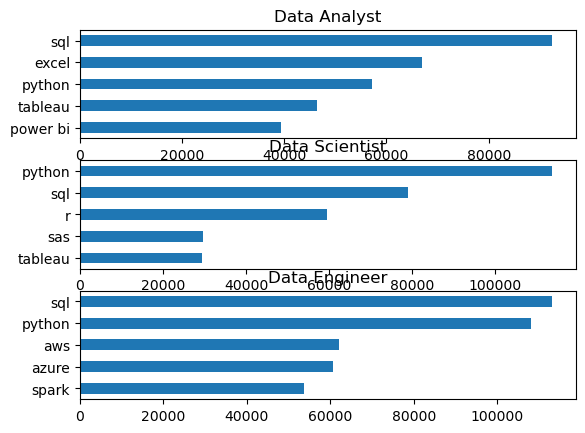

In [10]:
plotjobs = ['Data Analyst', 'Data Scientist', 'Data Engineer']

fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(plotjobs):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh', x='job_skills', y = 'skill_count', ax=ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)


